## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  13.777747   880.063141  0.539910   5.459574  475.331243
1  93.458444   940.780442  0.469750   2.942942  451.701217
2  43.963954  1113.293961  0.327452  10.714271  367.219221
3  89.525617   299.496943  0.295201   2.550883  125.953555
4   7.459564   534.274576  0.611497  10.962438  326.850505


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9681944	total: 55.4ms	remaining: 55.3s
1:	learn: 0.9563864	total: 56.1ms	remaining: 28s
2:	learn: 0.9465532	total: 56.5ms	remaining: 18.8s
3:	learn: 0.9359694	total: 57ms	remaining: 14.2s
4:	learn: 0.9236349	total: 57.6ms	remaining: 11.5s
5:	learn: 0.9137353	total: 58.2ms	remaining: 9.64s
6:	learn: 0.9023929	total: 58.6ms	remaining: 8.32s
7:	learn: 0.8911517	total: 59.1ms	remaining: 7.33s
8:	learn: 0.8801899	total: 59.5ms	remaining: 6.56s
9:	learn: 0.8689485	total: 59.9ms	remaining: 5.93s
10:	learn: 0.8582027	total: 60.3ms	remaining: 5.42s
11:	learn: 0.8444367	total: 60.9ms	remaining: 5.01s
12:	learn: 0.8328874	total: 61.4ms	remaining: 4.66s
13:	learn: 0.8218160	total: 62ms	remaining: 4.36s
14:	learn: 0.8104275	total: 62.3ms	remaining: 4.09s
15:	learn: 0.8003615	total: 62.7ms	remaining: 3.86s
16:	learn: 0.7902589	total: 63.1ms	remaining: 3.65s
17:	learn: 0.7806553	total: 63.7ms	remaining: 3.47s
18:	learn: 0.7737108	total: 64.2ms	remaining: 3.31

35:	learn: 0.6308761	total: 72ms	remaining: 1.93s
36:	learn: 0.6220105	total: 72.5ms	remaining: 1.89s
37:	learn: 0.6140069	total: 73ms	remaining: 1.85s
38:	learn: 0.6076308	total: 73.5ms	remaining: 1.81s
39:	learn: 0.5995826	total: 73.9ms	remaining: 1.77s
40:	learn: 0.5911242	total: 74.4ms	remaining: 1.74s
41:	learn: 0.5845282	total: 74.9ms	remaining: 1.71s
42:	learn: 0.5772054	total: 75.5ms	remaining: 1.68s
43:	learn: 0.5701286	total: 75.9ms	remaining: 1.65s
44:	learn: 0.5657003	total: 76.3ms	remaining: 1.62s
45:	learn: 0.5582759	total: 76.8ms	remaining: 1.59s
46:	learn: 0.5499334	total: 77.3ms	remaining: 1.57s
47:	learn: 0.5440572	total: 77.7ms	remaining: 1.54s
48:	learn: 0.5387653	total: 78.2ms	remaining: 1.52s
49:	learn: 0.5321743	total: 78.6ms	remaining: 1.49s
50:	learn: 0.5274022	total: 79ms	remaining: 1.47s
51:	learn: 0.5207600	total: 79.3ms	remaining: 1.45s
52:	learn: 0.5145951	total: 79.7ms	remaining: 1.42s
53:	learn: 0.5082223	total: 80.2ms	remaining: 1.41s
54:	learn: 0.50179

292:	learn: 0.0614138	total: 184ms	remaining: 444ms
293:	learn: 0.0609722	total: 185ms	remaining: 444ms
294:	learn: 0.0607880	total: 185ms	remaining: 443ms
295:	learn: 0.0603608	total: 186ms	remaining: 443ms
296:	learn: 0.0601402	total: 187ms	remaining: 442ms
297:	learn: 0.0599609	total: 187ms	remaining: 441ms
298:	learn: 0.0595550	total: 188ms	remaining: 440ms
299:	learn: 0.0593533	total: 188ms	remaining: 439ms
300:	learn: 0.0591510	total: 189ms	remaining: 438ms
301:	learn: 0.0589504	total: 189ms	remaining: 437ms
302:	learn: 0.0584893	total: 190ms	remaining: 436ms
303:	learn: 0.0580508	total: 190ms	remaining: 435ms
304:	learn: 0.0578858	total: 191ms	remaining: 435ms
305:	learn: 0.0577197	total: 191ms	remaining: 434ms
306:	learn: 0.0574975	total: 192ms	remaining: 433ms
307:	learn: 0.0573229	total: 192ms	remaining: 432ms
308:	learn: 0.0571645	total: 193ms	remaining: 431ms
309:	learn: 0.0569912	total: 193ms	remaining: 430ms
310:	learn: 0.0566201	total: 194ms	remaining: 430ms
311:	learn: 

400:	learn: 0.0381545	total: 236ms	remaining: 353ms
401:	learn: 0.0379279	total: 237ms	remaining: 352ms
402:	learn: 0.0377066	total: 237ms	remaining: 351ms
403:	learn: 0.0375060	total: 238ms	remaining: 351ms
404:	learn: 0.0373095	total: 238ms	remaining: 350ms
405:	learn: 0.0370996	total: 239ms	remaining: 350ms
406:	learn: 0.0369187	total: 239ms	remaining: 349ms
407:	learn: 0.0367169	total: 240ms	remaining: 348ms
408:	learn: 0.0365176	total: 240ms	remaining: 347ms
409:	learn: 0.0363365	total: 241ms	remaining: 346ms
410:	learn: 0.0361671	total: 241ms	remaining: 346ms
411:	learn: 0.0359946	total: 242ms	remaining: 345ms
412:	learn: 0.0359375	total: 242ms	remaining: 344ms
413:	learn: 0.0358811	total: 243ms	remaining: 344ms
414:	learn: 0.0356945	total: 243ms	remaining: 343ms
415:	learn: 0.0356393	total: 244ms	remaining: 342ms
416:	learn: 0.0354572	total: 244ms	remaining: 341ms
417:	learn: 0.0352817	total: 244ms	remaining: 340ms
418:	learn: 0.0351094	total: 245ms	remaining: 340ms
419:	learn: 

637:	learn: 0.0175186	total: 348ms	remaining: 198ms
638:	learn: 0.0174729	total: 349ms	remaining: 197ms
639:	learn: 0.0173929	total: 350ms	remaining: 197ms
640:	learn: 0.0173485	total: 350ms	remaining: 196ms
641:	learn: 0.0172901	total: 351ms	remaining: 196ms
642:	learn: 0.0172532	total: 351ms	remaining: 195ms
643:	learn: 0.0172172	total: 352ms	remaining: 194ms
644:	learn: 0.0171740	total: 352ms	remaining: 194ms
645:	learn: 0.0171054	total: 352ms	remaining: 193ms
646:	learn: 0.0170643	total: 353ms	remaining: 193ms
647:	learn: 0.0169783	total: 353ms	remaining: 192ms
648:	learn: 0.0169490	total: 354ms	remaining: 191ms
649:	learn: 0.0169148	total: 355ms	remaining: 191ms
650:	learn: 0.0168336	total: 355ms	remaining: 190ms
651:	learn: 0.0167971	total: 355ms	remaining: 190ms
652:	learn: 0.0167309	total: 356ms	remaining: 189ms
653:	learn: 0.0166611	total: 356ms	remaining: 189ms
654:	learn: 0.0165955	total: 357ms	remaining: 188ms
655:	learn: 0.0165111	total: 357ms	remaining: 187ms
656:	learn: 

772:	learn: 0.0119267	total: 415ms	remaining: 122ms
773:	learn: 0.0118923	total: 416ms	remaining: 121ms
774:	learn: 0.0118677	total: 416ms	remaining: 121ms
775:	learn: 0.0118338	total: 417ms	remaining: 120ms
776:	learn: 0.0117911	total: 417ms	remaining: 120ms
777:	learn: 0.0117741	total: 418ms	remaining: 119ms
778:	learn: 0.0117634	total: 418ms	remaining: 119ms
779:	learn: 0.0117266	total: 419ms	remaining: 118ms
780:	learn: 0.0116696	total: 419ms	remaining: 118ms
781:	learn: 0.0116363	total: 420ms	remaining: 117ms
782:	learn: 0.0116032	total: 420ms	remaining: 116ms
783:	learn: 0.0115655	total: 420ms	remaining: 116ms
784:	learn: 0.0115330	total: 421ms	remaining: 115ms
785:	learn: 0.0115006	total: 421ms	remaining: 115ms
786:	learn: 0.0114730	total: 422ms	remaining: 114ms
787:	learn: 0.0114365	total: 422ms	remaining: 114ms
788:	learn: 0.0113959	total: 423ms	remaining: 113ms
789:	learn: 0.0113642	total: 423ms	remaining: 112ms
790:	learn: 0.0113271	total: 424ms	remaining: 112ms
791:	learn: 

993:	learn: 0.0069189	total: 527ms	remaining: 3.18ms
994:	learn: 0.0069164	total: 528ms	remaining: 2.65ms
995:	learn: 0.0069139	total: 528ms	remaining: 2.12ms
996:	learn: 0.0069115	total: 529ms	remaining: 1.59ms
997:	learn: 0.0068909	total: 529ms	remaining: 1.06ms
998:	learn: 0.0068767	total: 530ms	remaining: 530us
999:	learn: 0.0068526	total: 530ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

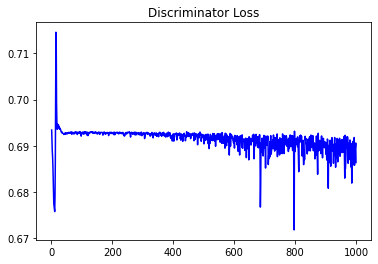

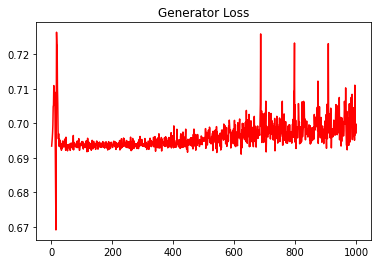

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0084958333021795


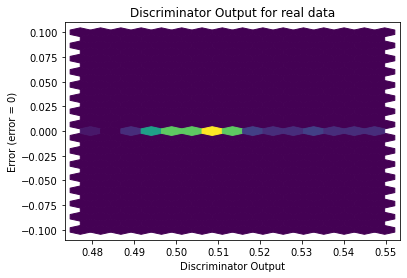

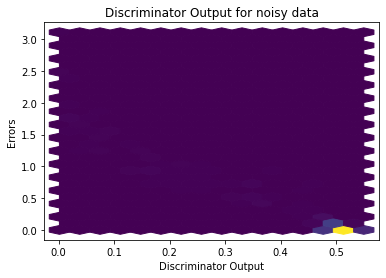

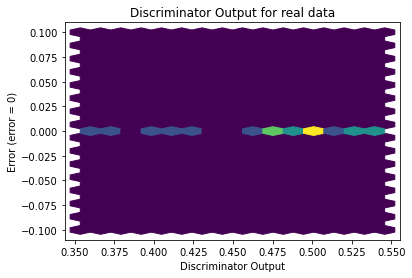

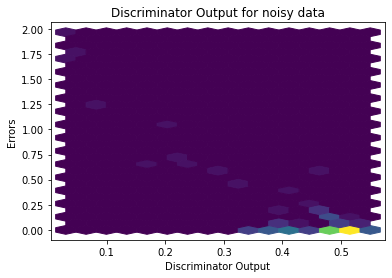

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


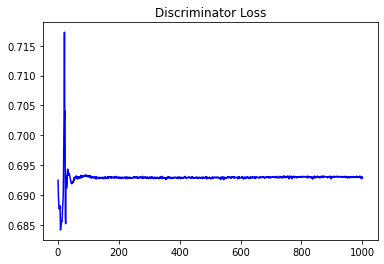

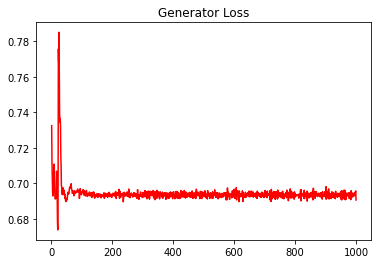

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01302634222332144


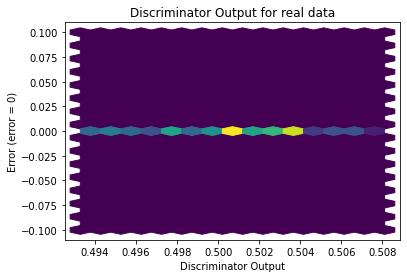

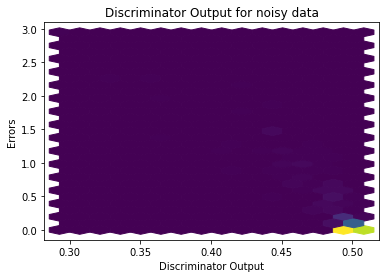

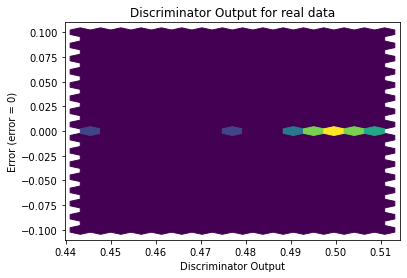

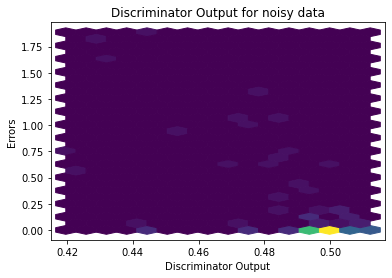

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3828]], requires_grad=True)
